In [53]:
from keras.datasets import imdb

# num words means we'll keep only the 10,000 most used words - rare words are discarded
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [54]:
# these datasets are using one-hot encoding

train_data[0]
train_labels[0]

# the consequenecs of the num_words param
max([max(sequence) for sequence in train_data])

9999

In [55]:
# Decoding a review back into english

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [56]:
# Turning this data into tensors
# Going with a binary matrix solution

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# also vectorize the labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [57]:
# Building the Network
# Input data of vectors, lebals are scalars: as easy as it comes

# "dense" means all neurons connect in each layer pair
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
# Configuring the Optimizer
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

# Losses and Metrics
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [59]:
# Setting aside some validation data

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [60]:
# Training the model

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5163 - acc: 0.7809 - val_loss: 0.3817 - val_acc: 0.8677
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3012 - acc: 0.9031 - val_loss: 0.3011 - val_acc: 0.8885
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2188 - acc: 0.9282 - val_loss: 0.2756 - val_acc: 0.8907
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1729 - acc: 0.9431 - val_loss: 0.2903 - val_acc: 0.8828
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1424 - acc: 0.9547 - val_loss: 0.3331 - val_acc: 0.8675
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1153 - acc: 0.9650 - val_loss: 0.2944 - val_acc: 0.8848
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0981 - acc: 0.9697 - val_loss: 0.3119 - val_acc: 0.8834
Epoch 8/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0780 - a

In [61]:
# The history object

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

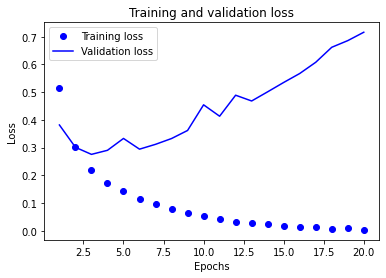

In [62]:
# Plotting the training and validation loss from the history object

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 21)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [67]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4818 - accuracy: 0.7986
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2691 - accuracy: 0.9086
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2030 - accuracy: 0.9288
Epoch 4/4
782/782 [==============================] - 1s 765us/step - loss: 0.2933 - accuracy: 0.8836


In [69]:
results
model.predict(x_test)

array([[0.22758943],
       [0.99876845],
       [0.8653634 ],
       ...,
       [0.1908609 ],
       [0.07342005],
       [0.6732898 ]], dtype=float32)